In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import pandas as pd

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, root_mean_squared_error, r2_score

tf.random.set_seed(200)

df = pd.read_csv("used_mobile_le.csv")
df['normalized_used_price'] = round(df['normalized_used_price']*100)
df['normalized_new_price'] = round(df['normalized_new_price']*100)

X = df.drop(columns=["normalized_used_price"])
y = df["normalized_used_price"]


In [47]:
tf_model = tf.keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(14, )),

    layers.Dense(16, activation='relu'),

    layers.Dense(1)
])


# Load the weights
weights_dict = np.load('round-150-weights.npz')

# Set the weights to the model layers
for layer in tf_model.layers:
    layer_name = layer.name
    if layer_name in weights_dict:
        layer_weights = weights_dict[layer_name]
        tf_model.get_layer(name=layer_name).set_weights(layer_weights)
        

tf_model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae', 'mape'])

# Verify that weights have been set
for layer in tf_model.layers:
    print(f"Layer: {layer.name}")
    print(f"Weights set: {len(layer.get_weights()) > 0}")
    print("---")




Layer: dense_54
Weights set: True
---
Layer: dense_55
Weights set: True
---
Layer: dense_56
Weights set: True
---


In [48]:
# evaluation
i = np.random.randint(0, len(X))
y_pred = tf_model.predict(X)


mae = mean_absolute_error(y, y_pred)
mape = mean_absolute_percentage_error(y, y_pred)
rmse = root_mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"MAE: {mae:.2f}, MAPE: {mape:.2f}, RMSE: {rmse:.2f}")

# Example of using the model for a new input
new_input = X.iloc[i].values.reshape(1,-1)
prediction = tf_model.predict(new_input)
print(f"Actual price: {y[i]:.2f}, Predicted price: {np.abs(prediction[0][0]):.2f}")

63/63 [==============================] - 0s 1ms/step
MAE: 68.26, MAPE: 0.15, RMSE: 81.09
1/1 [==============================] - 0s 48ms/step
Actual price: 516.00, Predicted price: 527.24


In [52]:
model = tf.keras.models.load_model("best_model.h5")

In [53]:
df = pd.read_csv("flagship.csv")

X = df.drop(columns=["normalized_used_price"])
y = df["normalized_used_price"]

In [54]:
# evaluation
i = np.random.randint(0, len(X))
y_pred = model.predict(X)


mae = mean_absolute_error(y, y_pred)
mape = mean_absolute_percentage_error(y, y_pred)
rmse = root_mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"MAE: {mae:.2f}, MAPE: {mape:.2f}, RMSE: {rmse:.2f}")

# Example of using the model for a new input
new_input = X.iloc[i].values.reshape(1,-1)
prediction = model.predict(new_input)
print(f"Actual price: {y[i]:.2f}, Predicted price: {np.abs(prediction[0][0]):.2f}")

63/63 [==============================] - 0s 1ms/step
MAE: 17.08, MAPE: 0.04, RMSE: 20.88
1/1 [==============================] - 0s 47ms/step
Actual price: 429.00, Predicted price: 408.96


1/1 [==============================] - 0s 22ms/step


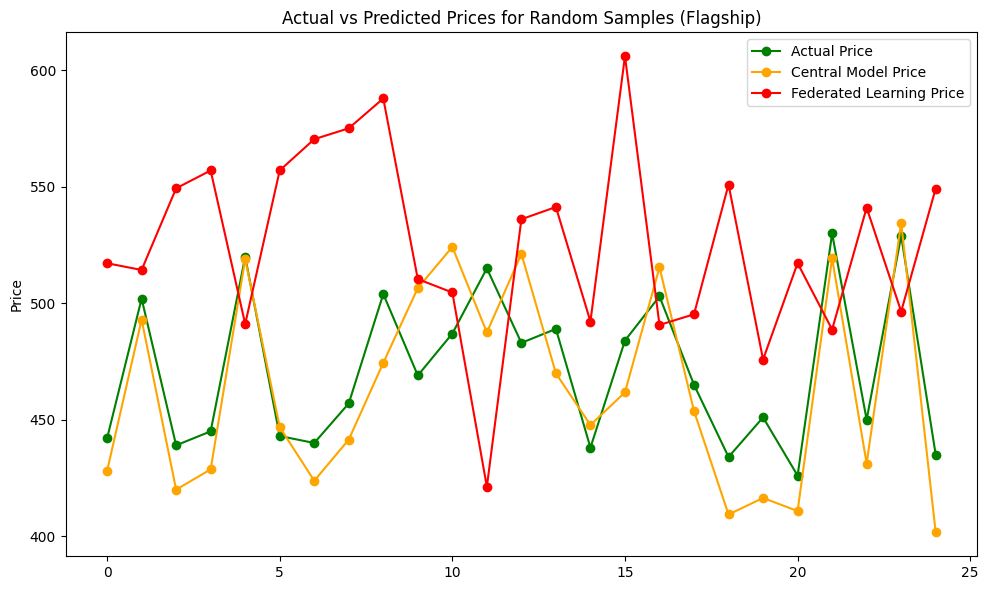

In [68]:
import matplotlib.pyplot as plt


n_samples = 25
random_indices = np.random.randint(1, len(X), size=n_samples)

y_pred_central = model.predict(X.iloc[random_indices].values)
y_pred_fed = tf_model.predict(X.iloc[random_indices].values)
y_actual = y[random_indices]


plt.figure(figsize=(10, 6))
plt.plot(range(n_samples), y_actual, 'o-', label='Actual Price', color='green')
plt.plot(range(n_samples), y_pred_central, 'o-', label='Central Model Price', color='orange')
plt.plot(range(n_samples), y_pred_fed, 'o-', label='Federated Learning Price', color='red')


plt.title('Actual vs Predicted Prices for Random Samples (Flagship)')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()

# # Print the actual vs predicted values
# for i in range(n_samples):
#     print(f"Sample {i+1}: Actual price: {y_actual[i]:.2f}, Predicted price: {y_pred[i][0]:.2f}")